# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

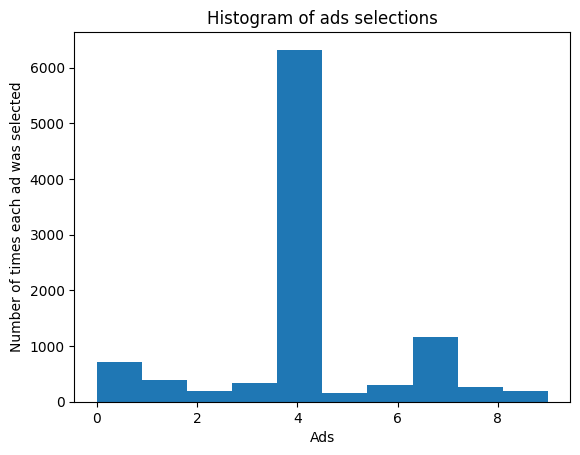

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

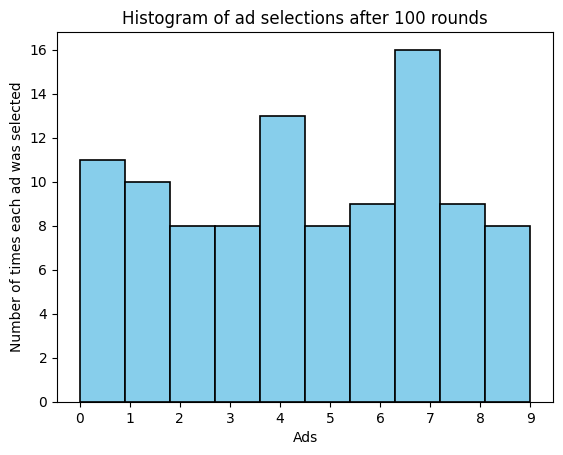

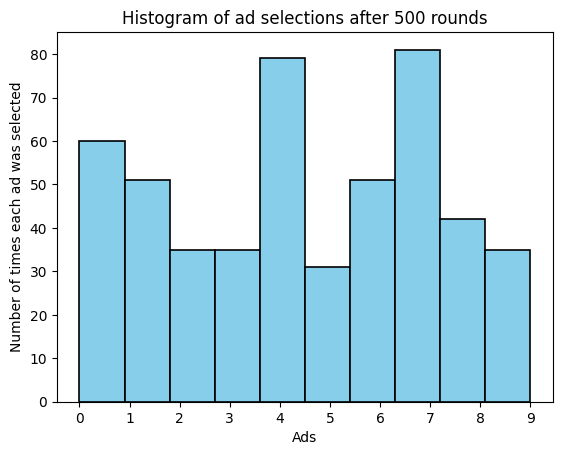

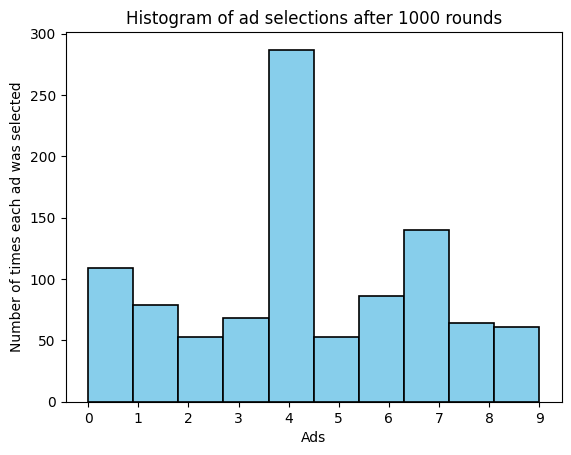

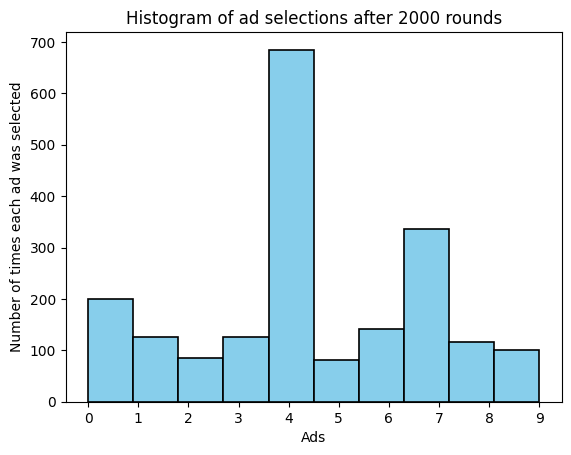

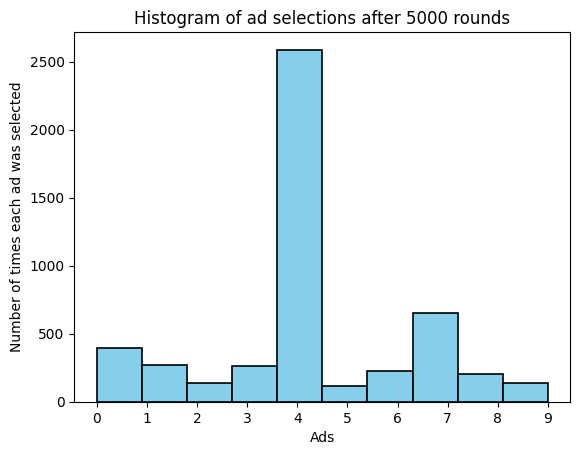

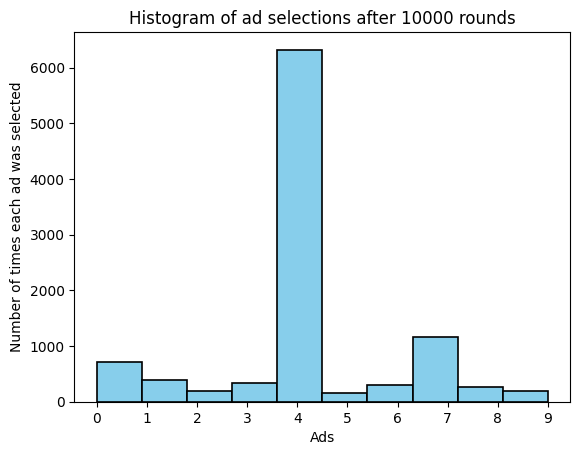

In [ ]:
import math
import matplotlib.pyplot as plt

# Ustawienia symulacji
N = 10000  # całkowita liczba rund
d = 10  # liczba reklam (działań)
ads_selected = []  # lista wybranych reklam w kolejnych rundach
numbers_of_selections = [0] * d  # liczba wyborów dla każdej reklamy
sums_of_rewards = [0] * d  # suma nagród dla każdej reklamy
total_reward = 0  # suma ogólna nagród

# Parametry do generowania histogramu
num_rounds_to_plot = [100, 500, 1000, 2000, 5000, 10000]  # liczba rund do wygenerowania histogramu

for n in range(1, N + 1):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n - 1, ad]  # założenie, że dane są w zmiennej dataset
    sums_of_rewards[ad] += reward
    total_reward += reward

    # Tworzenie histogramu dla określonych rund
    if n in num_rounds_to_plot:
        plt.figure()
        plt.hist(ads_selected, bins=d, color='skyblue', edgecolor='black', linewidth=1.2)
        plt.title(f'Histogram of ad selections after {n} rounds')
        plt.xlabel('Ads')
        plt.ylabel('Number of times each ad was selected')
        plt.xticks(range(d))
        plt.show()